In [47]:
import os
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

path_train = os.path.join('./', 'dataset_birds/train/')

# on recupère toute les classes dans une liste
classes = []
for item in os.listdir(path_train):
    classes.append(item)

In [48]:
# on créé une liste contenant le nombre d'images par classe

images_count = []
for folder in classes:
    items = os.listdir(path_train+folder)
    images_count.append(len(items))

In [49]:
# on créé un DataFrame contenant ces deux listes

dict = {'classe': classes, 'img_nbr': images_count}

df = pd.DataFrame(dict)
df = df.set_index("classe")
df.head()

,img_nbr
classe,
ABBOTTS BABBLER,163
ABBOTTS BOOBY,180
ABYSSINIAN GROUND HORNBILL,179
AFRICAN CROWNED CRANE,135
AFRICAN EMERALD CUCKOO,154


Ici, on voit que la répartition du nombre d'images n'est pas très équitable, ce qui nécessitera un traitement 
 



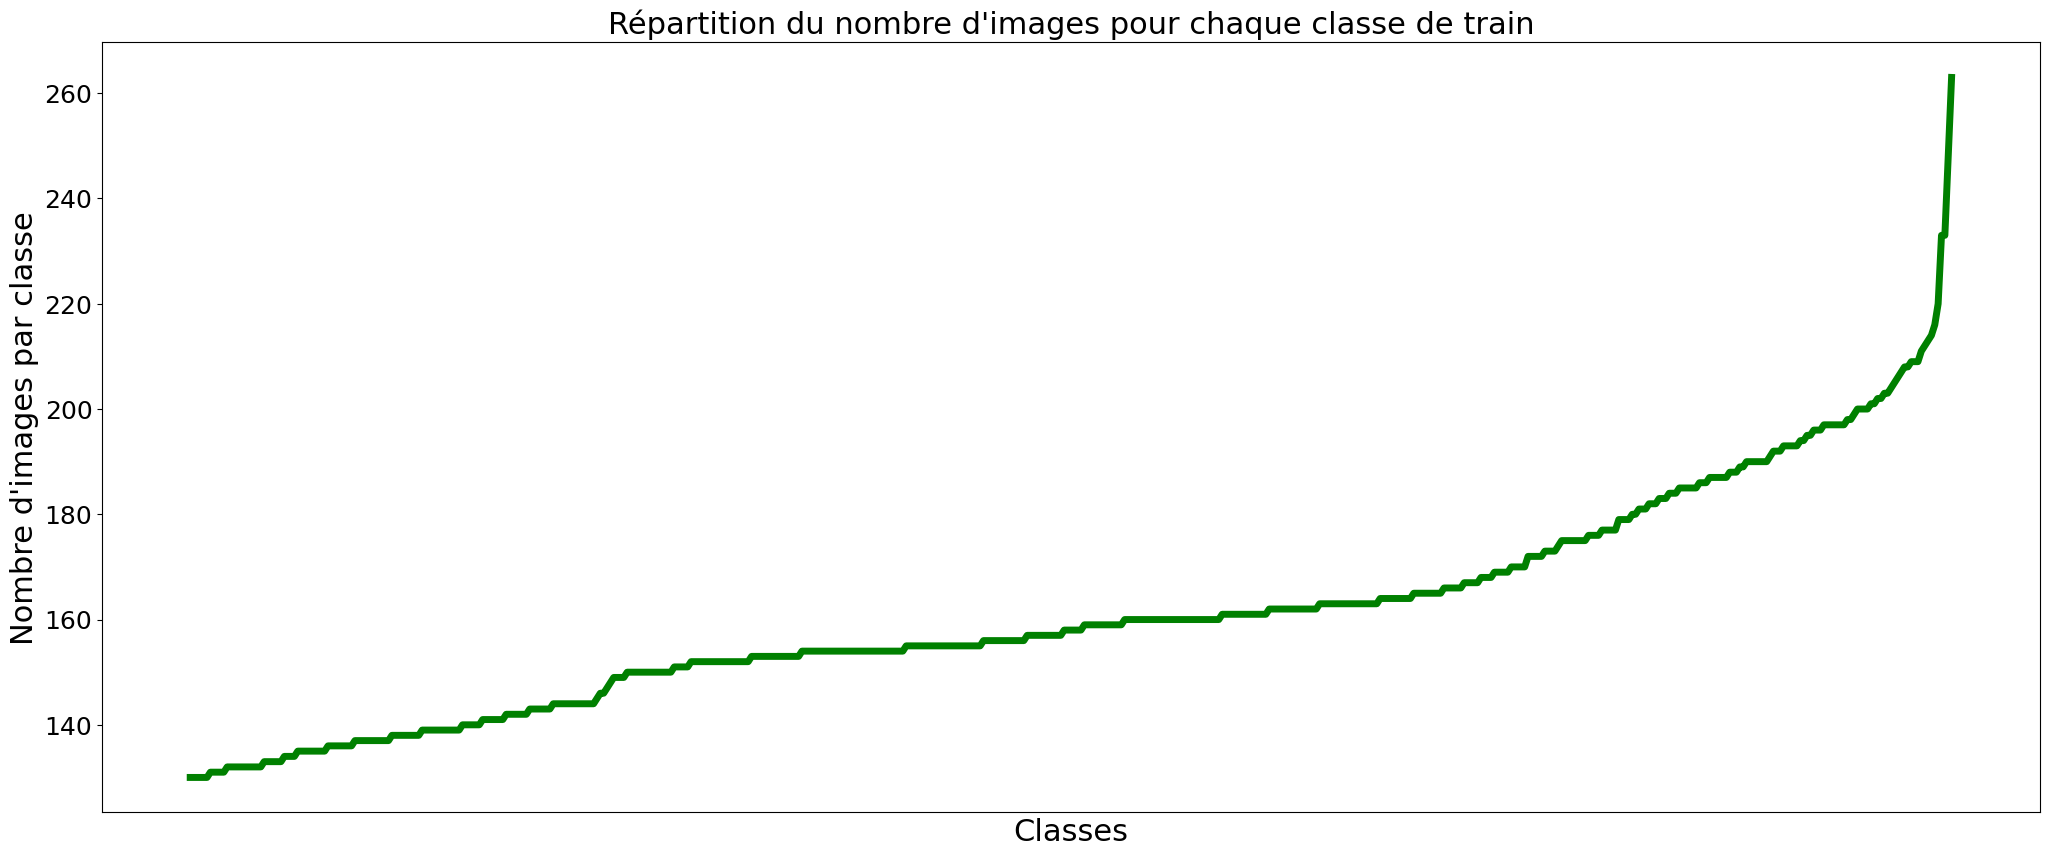

In [69]:
# on affiche une courbe représentant le nombre d'images par classes

plt.figure(figsize = (25,10))
df = df.sort_values(by = 'img_nbr')
plt.plot(df.index, df.img_nbr, linewidth = 5, color = 'green')
plt.title("Répartition du nombre d'images pour chaque classe de train", fontsize = 22)
plt.xlabel("Classes", fontsize = 22)
plt.ylabel("Nombre d'images par classe", fontsize = 22)
plt.xticks([])
plt.yticks(fontsize = 18);

print("Ici, on voit que la répartition du nombre d'images n'est pas très équitable, ce qui nécessitera un traitement \n \n")

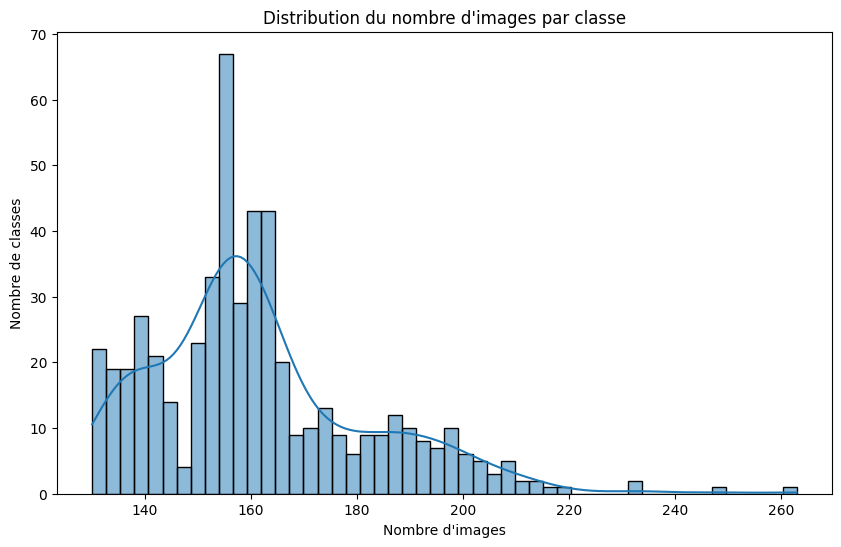

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(df['img_nbr'], bins=50, kde=True)
plt.title('Distribution du nombre d\'images par classe')
plt.xlabel('Nombre d\'images')
plt.ylabel('Nombre de classes')
plt.show()

# on remarque ici que la pluparrt 

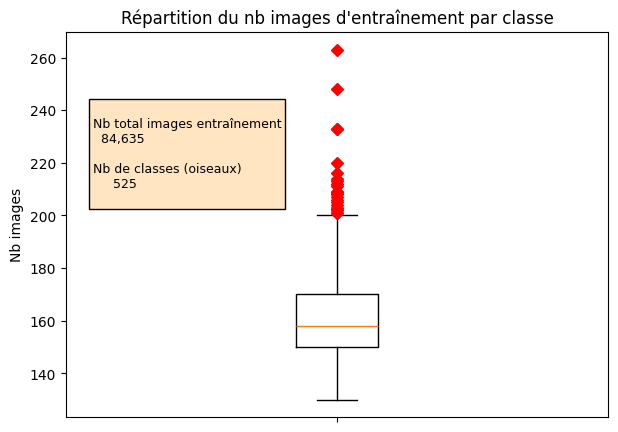

In [52]:
# Analyse distribution : boxplot
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)
ax1.boxplot(df, 0, 'rD')
ax1.set_xticks([1], [])
ax1.set_ylabel('Nb images')
titre = ax1.set_title("Répartition du nb images d'entraînement par classe")

# Ajout texte avec informations complémentaires dans le graphique
txt = f"""
Nb total images entraînement
{df['img_nbr'].sum():>8,.0f}

Nb de classes (oiseaux)
{df.shape[0]:>8,.0f}
"""
t = ax1.text(0.55, 205, txt, fontsize="9", bbox={'boxstyle':'square',
                   'facecolor': '#ffe5c1',
                   'edgecolor':'black'})

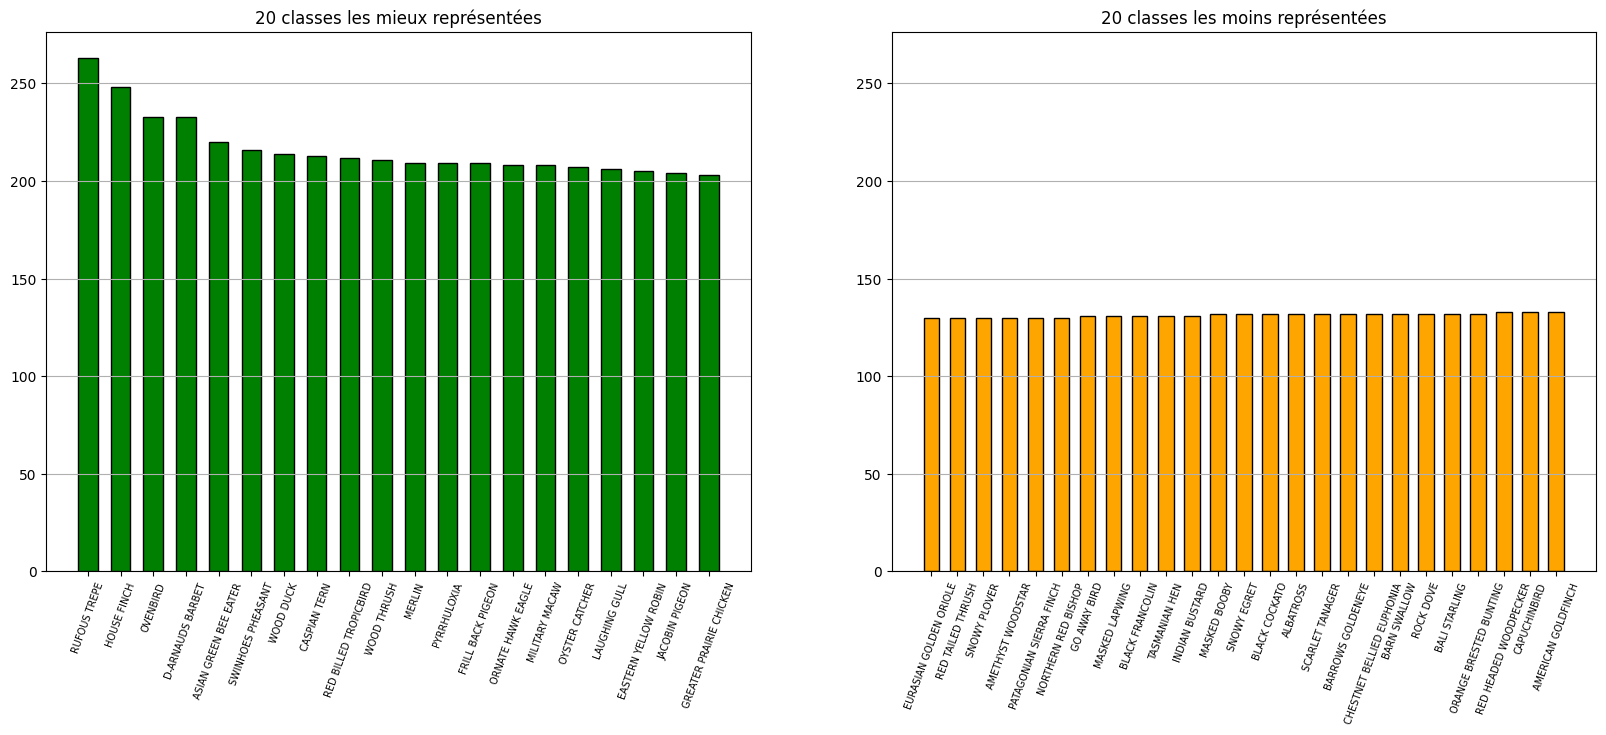

In [65]:
### Affichage des 10 classes les mieux et moins bien représentées
fig = plt.figure(figsize=(20, 7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey=ax1)

# 10 Classes les mieux representées
best = df.sort_values(by='img_nbr', ascending=False).head(20)
ax1.bar(best.index, best['img_nbr'], color='green', width=0.6, edgecolor='black')
ax1.grid(True, axis='y')
ax1.set_title('20 classes les mieux représentées')
ax1.tick_params(axis='x', labelrotation=70)
for t in ax1.get_xticklabels():
   t.set_fontsize(7.)

# 10 Classes les moins bien representées
worse = df.sort_values(by='img_nbr').head(25)
ax2.bar(worse.index, worse['img_nbr'], color='orange', width=0.6, edgecolor='black')
ax2.grid(True, axis='y')
ax2.set_title('20 classes les moins représentées')
ax2.tick_params(axis='x', labelrotation=70)
for t in ax2.get_xticklabels():
   t.set_fontsize(7.)